Generate Data


Now that you've computed statistics for a single card draw, we're going to look at the statistics for the sum of scores when making three card draws. Since there are so many ways of drawing three cards from a deck of cards, we're going to approach this using sampling to make estimates.

In each trial, cards will be drawn without replacement, meaning that in a single set of three, each card can appear at most once. After each trial, the cards that were drawn are shuffled back in the deck so that they could be drawn again in the following trial.

You can generate card draws in two ways. First of all, you can use the quiz box below to generate data for you. Trials will be organized into individual rows. Each card is encoded as a string consisting of the rank (A, 2-10, J, Q, K) followed by the suit (c, d, h, s). Thirty trials will be performed for your analysis. Alternatively, you can perform the sampling procedure using a physical deck of cards. Make sure that you only replace and shuffle the cards into the deck after each set of three cards is drawn. Collect at least thirty trials for your analysis.

In [111]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import math

In [112]:
numOfCardsDraw = 3
sampleSize = 10000
cards = ['Ac', '2c', '3c', '4c', '5c', '6c', '7c', '8c', '9c', '10c', 'Jc', 'Qc', 'Kc',\
            'Ad', '2d', '3d', '4d', '5d', '6d', '7d', '8d', '9d','10d', 'Jd', 'Qd', 'Kd',\
            'Ah', '2h', '3h', '4h', '5h', '6h', '7h', '8h', '9h', '10h', 'Jh', 'Qh', 'Kh',\
            'As', '2s', '3s', '4s', '5s', '6s', '7s', '8s', '9s', '10s', 'Js', 'Qs', 'Ks']
population = [random.sample(cards, numOfCardsDraw) for _ in range(sampleSize)] 

First, create a histogram depicting the relative frequencies of the card values for a single draw. Report the mean, median, and standard deviation of the value distribution. (You should have performed this step in the Distribution of Card Values section.)

In [118]:
# For drawing 3 cards per experiment.
numOfCardsDraw = 3
sampleSize = 10000
cards = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10,\
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10, \
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10,\
            1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 10, 10, 10]
population = [sum(random.sample(cards, numOfCardsDraw)) for _ in range(sampleSize)]

TypeError: 'int' object is not callable

In [114]:
generatedData = [
['Jd','8s','6c']
,['4d','3s','7s']
,['7s','Kc','Jd']
,['8h','Js','7s']
,['Jh','Qh','As']
,['2d','Js','10c']
,['9h','5d','Qh']
,['Js','9h','3d']
,['9d','3h','Ah']
,['10s','2h','Ac']
,['8s','3c','5d']
,['Kd','10h','Qh']
,['Jd','As','9c']
,['3s','5c','Ac']
,['Ac','3h','10d']
,['Jc','8s','7h']
,['10h','6c','2d']
,['7d','7h','8c']
,['9h','4c','10s']
,['3h','6d','Qc']
,['3c','6c','2c']
,['Ac','As','2s']
,['10c','4h','8s']
,['5s','7c','7s']
,['9s','10s','4s']
,['9c','2s','6h']
,['7d','Ks','9s']
,['7c','5s','10h']
,['Js','3s','Qc']
,['6s','5d','9c']
]
mapVal = {'A':1,'2':2,'3':3,'4':4,'5':5,'6':6,'7':7,'8':8,'9':9,'10':10,'J':10,'Q':10,'K':10}

sample=[]
for record in generatedData:
        totalCardValue=0
        for cardValue in record:
                totalCardValue = totalCardValue + mapVal[cardValue[0:-1]]
        sample.append(totalCardValue)
print(sample)
    

[24, 14, 27, 25, 21, 22, 24, 22, 13, 13, 16, 30, 20, 9, 14, 25, 18, 22, 23, 19, 11, 4, 22, 19, 23, 17, 26, 22, 23, 20]


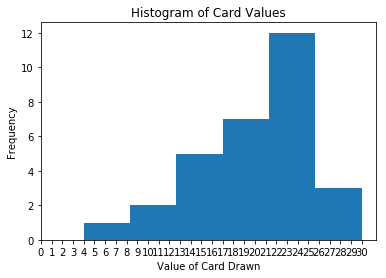

In [100]:
plt.hist(sample, bins='auto') 
plt.title('Histogram of Card Values') 
plt.xlabel('Value of Card Drawn')
plt.ylabel('Frequency')
plt.xticks(range(31))
plt.show()

Take a look at the distribution of the three-card sums from the samples that you obtained, either from Generate Data, or from your own collection. Report descriptive statistics for the samples you have drawn. Include at least two measures of central tendency and two measures of variability.

In [116]:
samSeries = pd.Series(sample)
mean = samSeries.mean()
median = samSeries.median()
std = samSeries.std()
mode = samSeries.mode()
variance = samSeries.var()

print("Mean = %f , Median = %f , Mode = %f , Variance = %f , Standard Deviation = %f" %(mean,median,mode,variance,std))

quantile50 = samSeries.quantile()
quantile25 = samSeries.quantile(q=0.25)
quantile75 = samSeries.quantile(q=0.75)

IQR = quantile75 - quantile25
print("Quantile(50 percent) = %f , interquartile range = %f" %(quantile50,IQR))

samSeries.describe()


Mean = 19.600000 , Median = 21.500000 , Mode = 22.000000 , Variance = 33.420690 , Standard Deviation = 5.781063
Quantile(50 percent) = 21.500000 , interquartile range = 6.750000


count    30.000000
mean     19.600000
std       5.781063
min       4.000000
25%      16.250000
50%      21.500000
75%      23.000000
max      30.000000
dtype: float64

Create a histogram of the sampled three-card sums. Compare its shape to that of the original distribution. How are they different, and can you explain why this is the case?

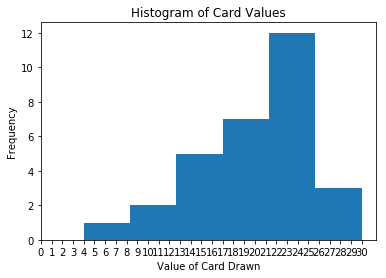

In [117]:
plt.hist(sample, bins='auto') 
plt.title('Histogram of Card Values') 
plt.xlabel('Value of Card Drawn')
plt.ylabel('Frequency')
plt.xticks(range(31))
plt.show()

Make some estimates about values you would get on future draws. Within what range will you expect approximately 90% of your draw values to fall?

What is the approximate probability that you will get a draw value of at least 20? Make sure you justify how you obtained your values. Link to z-table : https://s3.amazonaws.com/udacity-hosted-downloads/ZTable.jpg

Further refering https://discussions.udacity.com/t/evaluate-answers-seed-50/252527/4, to find the answer
we need to find first find z-score using x=19.5
=>z-score = (19.5-19.6)/5.78 =-0.01730103806228398= -.02
The probabilty of finding < -.02 z-score is 0.4920 as per z-table
Therefore , approximate probability that you will get a draw value of at least 20 = 1 - 0.4920 = 0.508


The normal distribution is used to estimate these values, following the central limit theorem. Note that values have been computed exactly, rather than using a table, so there might be slight differences between your results and the grader. In addition, the grader assumes the discrete outputs to be centered on bars with bins at the half-integer values. For example, a sum of 20 is generated when the normal distribution rolls a value between 19.5 and 20.5.

90% of all draw sums should fall between 10 and 29.

Draws of at least 20 should occur with probability approximately 0.5069.